In [13]:
import pymysql
import numpy as np
class ConnectDatabase:
    def connect(self,host,user,passwd,database):
        self.db=pymysql.connect(host=host,user=user,password=passwd,database=database)
        self.cursor=self.db.cursor()
    def close(self):
        self.db.close()
        self.cursor.close()
    def executeSql(self,sql):
        self.cursor.execute(sql)
        return self.cursor.fetchall()

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#数据预处理1
con=ConnectDatabase()
con.connect("localhost","root","root","data")
sql='select year,count(*) from dt3 where score>5 group by year order by year;'
result=con.executeSql(sql)
year=list(range(2010,2022))
big=[]
for i in range(len(year)):
    big.append(0)
for row in result:
    big[year.index(row[0])]=row[1]
sql='select year,count(*) from dt3 where score<=5 group by year order by year;'
result=con.executeSql(sql)
little=[]
for i in range(len(year)):
    little.append(0)
for row in result:
    little[year.index(row[0])]=row[1]
print(len(big),len(little))

newYear=[]
for row in year:
    newYear.append(str(row))
font_size = 10 # 字体大小
fig_size = (8, 6) # 图表大小
# 更新字体大小
mpl.rcParams['font.size'] = font_size
# 更新图表大小
mpl.rcParams['figure.figsize'] = fig_size
# 设置柱形图宽度
bar_width = 0.35
names = (u'评分大于5的电影数量', u'评分小于5的电影数量') # 姓名
alldata = [big,little] # 成绩

12 12


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24433 missing from cur

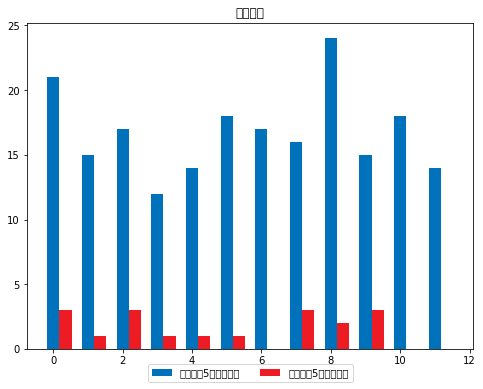

In [18]:
index = np.arange(len(alldata[0]))
rects1 = plt.bar(index, alldata[0], bar_width, color='#0072BC', label=names[0])
# 绘制「小红」的成绩
rects2 = plt.bar(index + bar_width, alldata[1], bar_width, color='#ED1C24', label=names[1])
# 图表标题
plt.title(u'电影统计')
# 图例显示在图表下方
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5)
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
        # 柱形图边缘用白色填充，纯粹为了美观
        rect.set_edgecolor('white')
